CONTINUACAO DO CURSO

In [ ]:
!pip install tensorflow

In [ ]:
# bibliotecas utilizadas
import cv2 #OpenCV
from google.colab.patches import cv2_imshow
from google.colab import drive
import dlib
from PIL import Image
import numpy as np
import zipfile
from sklearn.metrics import accuracy_score
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import Input, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import save_model
tf.__version__ #versao do tensorflow

'2.15.0'

In [ ]:
#caso de problema com a versao do tensorflow
#!pip install tensorflow == 2.6.0 #versao usada no curso

In [ ]:
# drive
drive.mount('/content/drive')

Mounted at /content/drive


# Projeto 9 - Redes Neurais Convolucionais

> basicamente possuem uma camada de pre processamento a mais do que uma RN comum.

> tecnica mais utilizada para visao computacional

> em geral eh melhor que SVM.

> em questao a extracao de caracteristicas eh complicado escolher quais sao as caracteriscas que segregam as imagens , alem de que o tamanmho da imagem se tiver que passar pixel a pixel exige um alto poder computacional.  

> uma RN Convolucional nao usa todas as entradas ou todos os pixels como entrada, ela descobre quais sao as caracterisitcas necessarias que descrevem a imagem, descartando aquilo que nao eh necessario. Faz a selecao automaticamente.

> a RNC ou CNN utiliza uma RN tradicional, porem transforma os dados na camada de entrada, ou seja, ha um pre processamento na camada de entrada.

> Uma CNN acontece em 4 etapas:
*   1. Operador de convolucao
*   2. Pooling
*   3. Flattening
*   4. Rede neural densa/tradicional.



---



> `Operador de convolucao`: Concolucao eh processo de adicionar cada elemento da imagem para seus vizinho, sendo ponderado por um kernel.

> a imagem eh uma matriz e o kernel eh outra matriz, nao necessariamente do mesmo tamanho ambas.

> kernel sao como filtros (possuem varios tipos) que processam uma imagem e mudam a formatacao original dela tornando facil encontrar caracteristicas marcantes em uma imagem.

> quando matriz kernel eh menor que a matriz imagem eh feita uma multiplicacao de partes/porcoes/janelas da matriz uma de cada vez.

> A multiplicacao gera um mapa de caracteristicas.

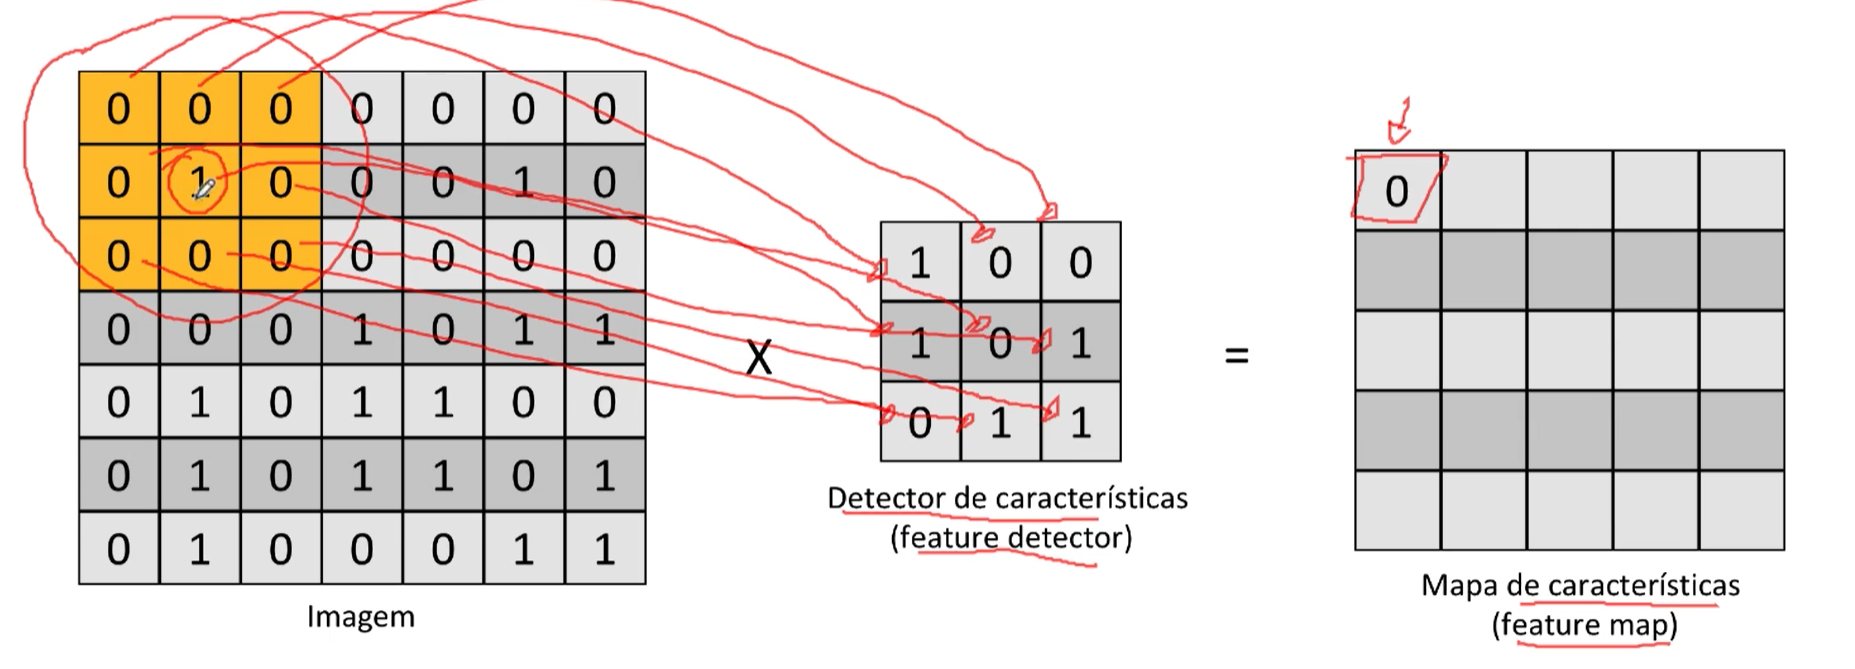

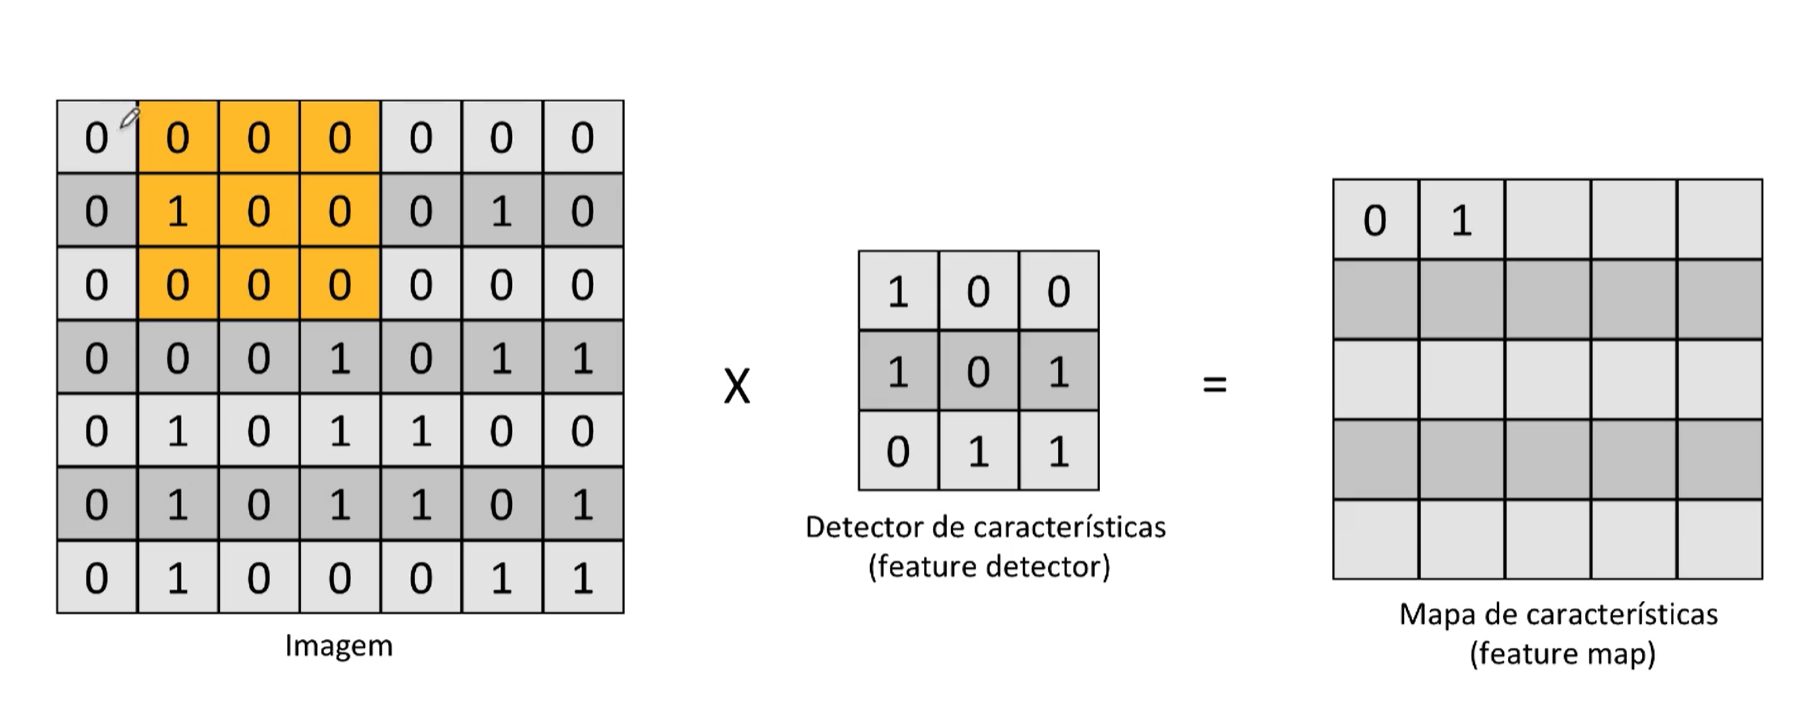

> Vai coluna a coluna e linha a linha.Quanto maiores s valores no mapa, mais importantes ssao as caracteristicas

> o mapa eh menor para facilitar o processamento. Assim nao usamoss todos os pixels.

> pode haver perda de caracteristicas importantes da imagem original, entretanto estamos em busca das mais importantes apenas.

> por fim a aplicacao da funcao de  ativacao Relu no mapa de caracteristicas, tornando valores negativos como 0 e mantendo os valores positivos.

> a camada de convolucao nada mais eh do que a aplicaccao dos mapas de caracteristicas. A RN aplica diversos filtros para encontrar quais sao os melhores.

> faz parte da aprendizagem de uma CNN descobrir nao so os pesos como quais sao os melhoress kernels/detector de caracteristicas.   



---



> `Pooling`: eh como um Data Augmentation, rotacionando, mudando o tamanho e identificando apenas as partes nessarias para a classificacao.

>  com o mapa de ccaracterissticas eh aplicada a tecnica de pooling. Isso faz uma reducao de dimensionalidade. Existem varias delas como max, min, mean. A max eh a melhor para buscar as caracteristicas mais relevantes.

> a tecnica nao eh como o kernel, nao eh linha a linha, nem coluna a coluna.

> isso serve para reduzir overfitting e ruidos desnecessarios.

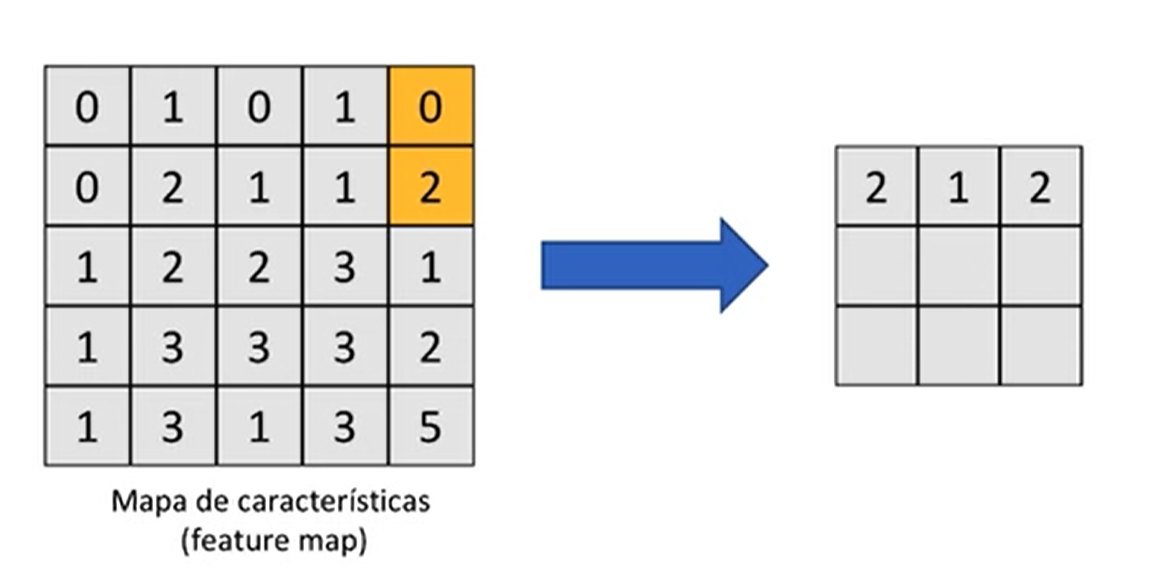

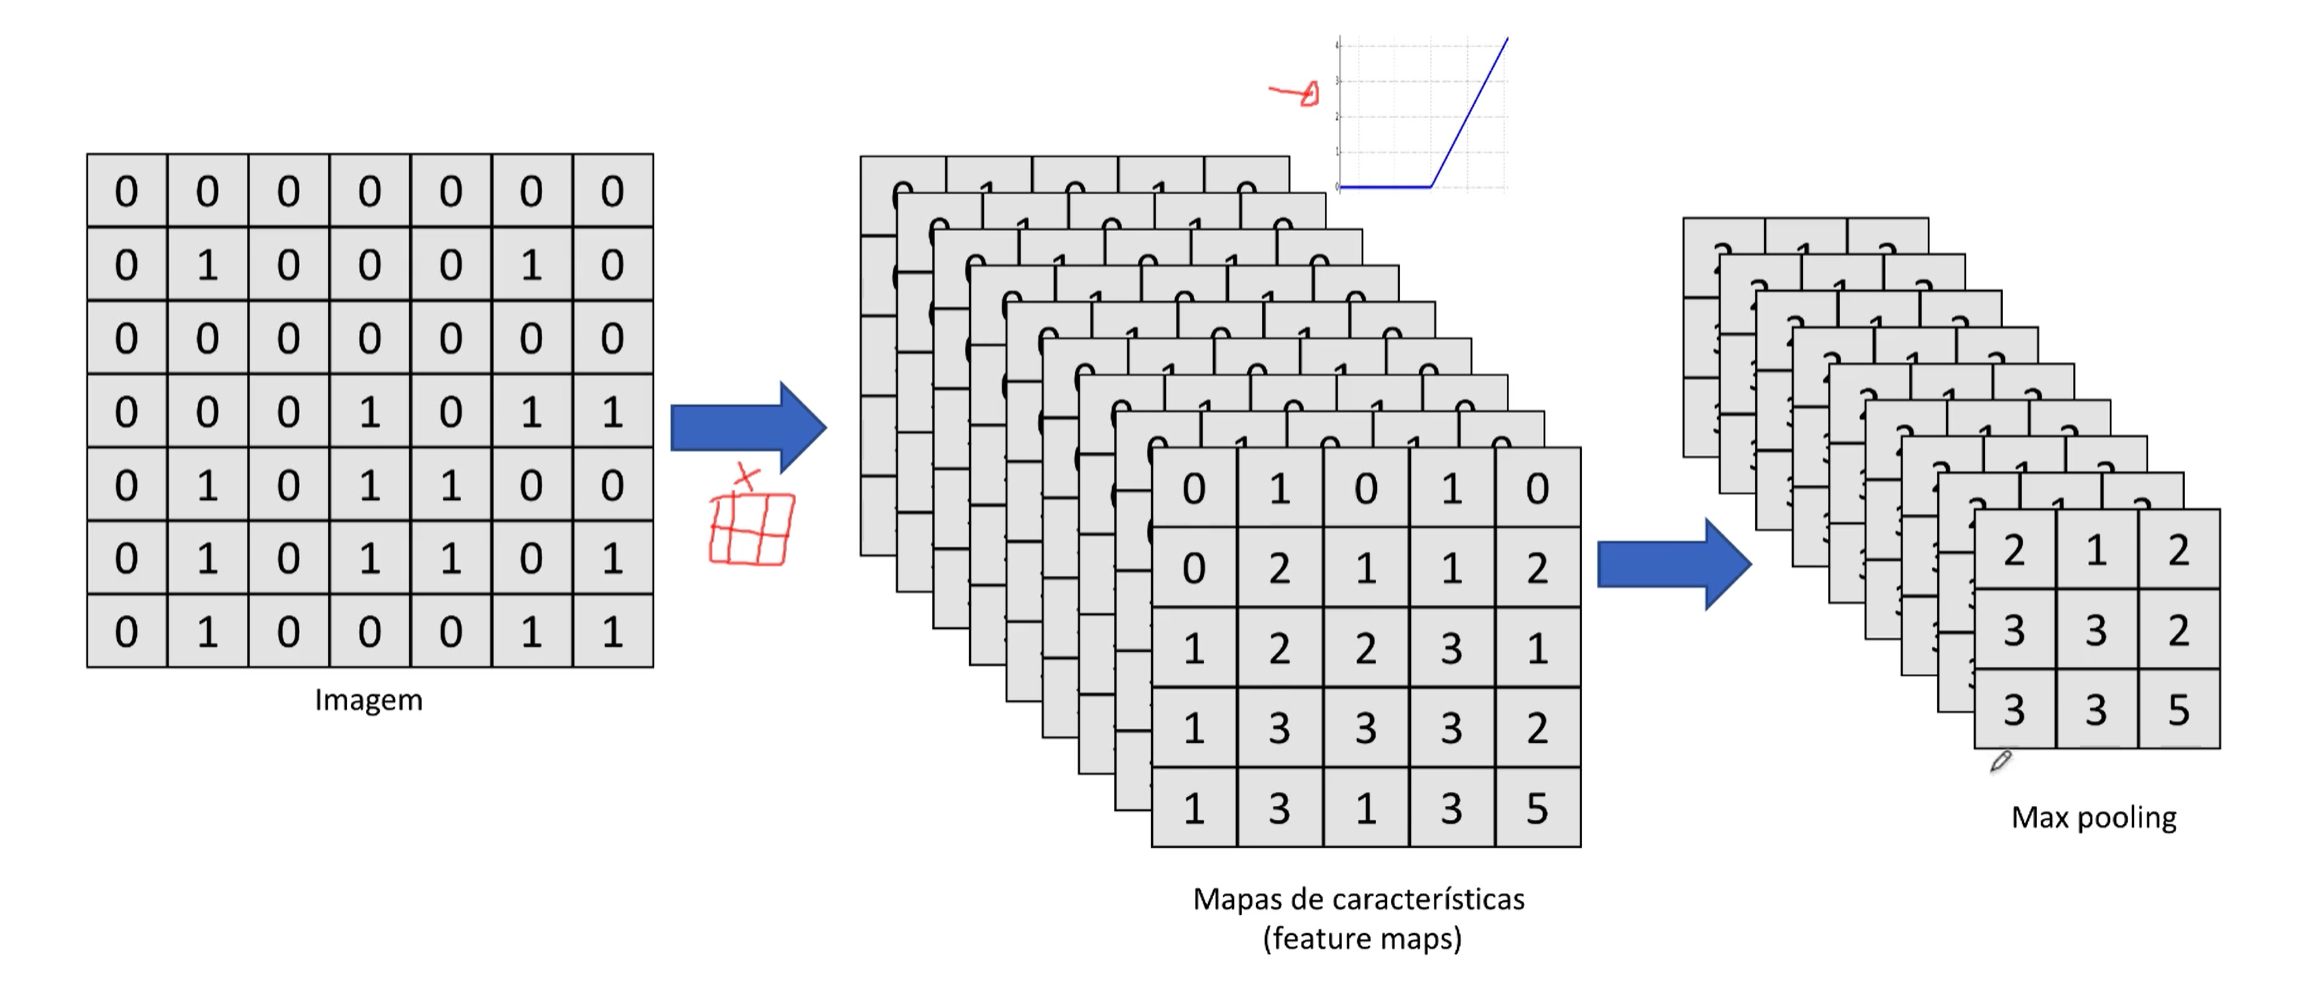

`Flattening`: transformar de um formato de vetor a matriz gerada pelo pooled feature map.

> eh necessario esse formato para a aplicacao da rede neuraal densa. Assim cada indice desse vetor sera um neuronio.

> dessa etapa para frente eh uma rede como a feita anteriormente.

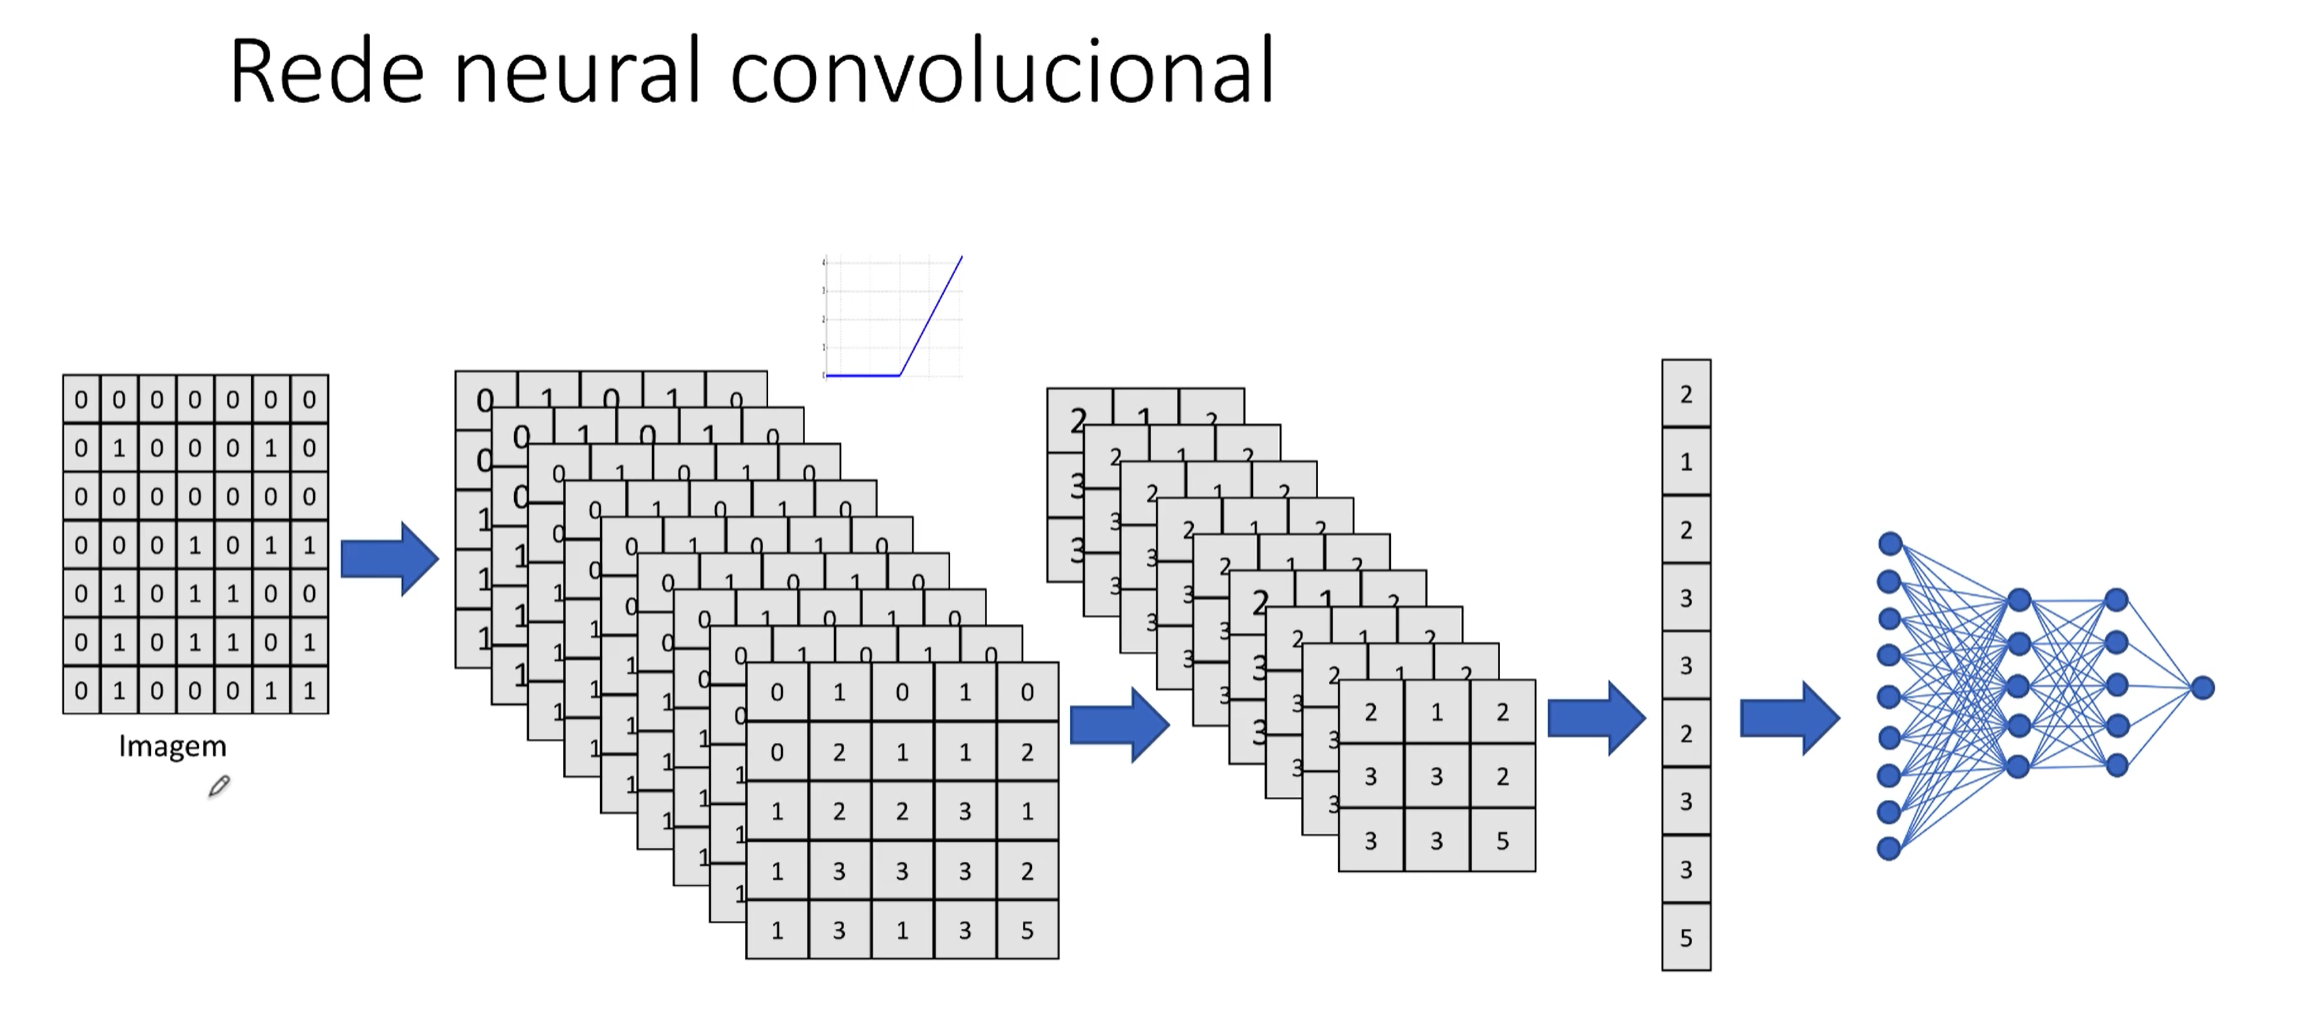



---



#  Implementacao CNN

## Carregando o dataset

In [ ]:
# puxando o dataset
path = '/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r') #r indica a leitura read
zip_object.extractall('./')
zip_object.close() #liberar memoria

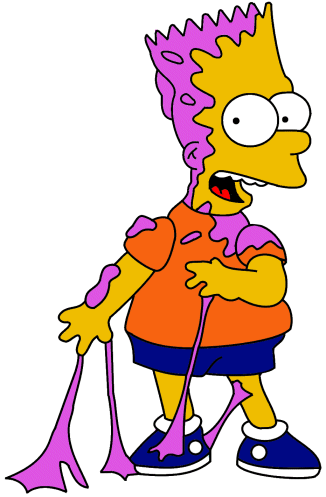

In [ ]:
# usando o tensor flow para vizualizar uma imagem e nao o Cv2
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/bart/bart1.bmp')

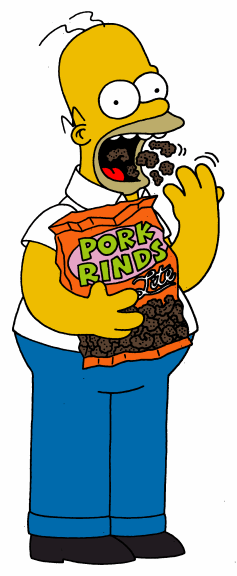

In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/homer/homer1.bmp')

## Split

In [ ]:
# base de treinamento
gerador_train = ImageDataGenerator(rescale = 1./255, rotation_range = 7, horizontal_flip = True, zoom_range = 0.2)
# a classe ImageDataGenerato gera novas imagens alterando as originais.
# o rescale eh a normalizacao dos pixels entre 0 e 1

In [ ]:
dataset_train = gerador_train.flow_from_directory('/content/homer_bart_2/training_set',
                                                  target_size = (64,64),
                                                  batch_size = 8,
                                                  class_mode = 'categorical',
                                                  shuffle = True)

Found 215 images belonging to 2 classes.


In [ ]:
dataset_train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
dataset_train.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
# base de teste, nao eh preciso fazer alteracoes
gerador_test = ImageDataGenerator(rescale=1./255)
dataset_test = gerador_test.flow_from_directory('/content/homer_bart_2/test_set',
                                                target_size = (64,64),
                                                batch_size = 1,
                                                class_mode  = 'categorical',
                                                shuffle=False)

Found 54 images belonging to 2 classes.


In [ ]:
dataset_test.class_indices

{'bart': 0, 'homer': 1}

##  Construcao e treinamento da rede neural

In [ ]:
cnn1 = Sequential()
cnn1.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
# a primeira cada eh de convolucao, serao gerados  32 detectores de  caracteristicas
# o filtros/kernels terao 3x3 de tamanho
# o 3 no final eh a quantidade de canais RGB
cnn1.add(MaxPool2D(pool_size=(2,2)))
#operacao de pooling para gerar a versao resumida das caracteristicas importantes das imagens
#o 2x2 eh como o pooling sera feito na imagem

cnn1.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))#segunda camada de convolucao
cnn1.add(MaxPool2D(pool_size=(2,2)))#segunda camada de pooling

cnn1.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))#terceira camada de convolucao
cnn1.add(MaxPool2D(pool_size=(2,2)))#terceira camada de pooling

cnn1.add(Flatten()) #transformar para vetor

cnn1.add(Dense(units = 577, activation='relu'))
cnn1.add(Dense(units = 577, activation =  'relu'))
cnn1.add(Dense(units = 2, activation =  'softmax')) #sao duas saidas por conta da forma categorical
#um problema com mais de duas classes nao vale sigmoid
#a funcao softmax retorna uma probabilidade para cada um dos neuronios
print('rede criada')

rede criada


In [ ]:
print(6*6*32) #a matriz da ultima camada de pooling sera transformada em um vetor de 1152 valores como mostra na celula abaixo de summary
print((6*6*32 +2)/2) #camada oculta

1152
577.0


In [ ]:
cnn1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 32)         

In [ ]:
cnn1.compile(optimizer  ='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #compilacao da rede

In [ ]:
historico = cnn1.fit(dataset_train, epochs = 50)

Epoch 1/50
27/27 [==============================] - 6s 39ms/step - loss: 0.6540 - accuracy: 0.6279
Epoch 2/50
27/27 [==============================] - 1s 28ms/step - loss: 0.6134 - accuracy: 0.6279
Epoch 3/50
27/27 [==============================] - 1s 20ms/step - loss: 0.5239 - accuracy: 0.7581
Epoch 4/50
27/27 [==============================] - 0s 17ms/step - loss: 0.4828 - accuracy: 0.7581
Epoch 5/50
27/27 [==============================] - 0s 16ms/step - loss: 0.4116 - accuracy: 0.8186
Epoch 6/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3848 - accuracy: 0.8047
Epoch 7/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3332 - accuracy: 0.8605
Epoch 8/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3477 - accuracy: 0.8279
Epoch 9/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3231 - accuracy: 0.8698
Epoch 10/50
27/27 [==============================] - 0s 18ms/step - loss: 0.2756 - accuracy: 0.9023
Epoch 11/

## Avaliacao

In [ ]:
previsoes =  cnn1.predict(dataset_test) #ccada imagem sera envaida para a rede neural
previsoes

54/54 [==============================] - 1s 4ms/step


array([[1.00000000e+00, 1.91542246e-27],
       [1.00000000e+00, 3.93542860e-19],
       [9.93706882e-01, 6.29319390e-03],
       [1.00000000e+00, 1.20013776e-33],
       [1.00000000e+00, 3.70179567e-24],
       [1.00000000e+00, 2.27018968e-28],
       [1.00000000e+00, 1.40575941e-12],
       [8.22026789e-01, 1.77973211e-01],
       [9.92380381e-01, 7.61961937e-03],
       [9.96671379e-01, 3.32864211e-03],
       [9.89314437e-01, 1.06855538e-02],
       [1.00000000e+00, 2.48698535e-16],
       [9.99999285e-01, 7.42927170e-07],
       [9.99996781e-01, 3.18606999e-06],
       [1.00000000e+00, 1.06740866e-10],
       [1.00000000e+00, 2.62176817e-36],
       [3.74656636e-04, 9.99625325e-01],
       [1.00000000e+00, 1.60535793e-15],
       [9.99994874e-01, 5.14595877e-06],
       [1.00000000e+00, 0.00000000e+00],
       [9.99327064e-01, 6.72965369e-04],
       [1.00000000e+00, 1.06451695e-26],
       [1.00000000e+00, 1.86360598e-14],
       [2.95781693e-03, 9.97042120e-01],
       [1.000000

In [ ]:
# comparacao
previsoes = np.argmax(previsoes, axis = 1)  #forma de pegar os maiores valores
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
dataset_test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
accuracy_score(dataset_test.classes, previsoes)

0.9259259259259259

<Axes: >

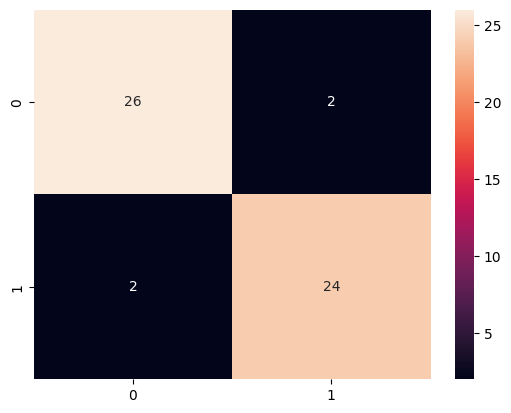

In [ ]:
cm = confusion_matrix(dataset_test.classes, previsoes)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(dataset_test.classes, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.92      0.92      0.92        26

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



## Salvar e carregar a rede.

In [ ]:
model_json = cnn1.to_json()
with open('cnn1.json', 'w') as json_file: #salvar a rede neural em formato json
  json_file.write(model_json)

In [ ]:
cnn1_saved = save_model(cnn1, 'weights.hdf5') #salvar os pesos da rede

<ipython-input-57-26b0ddc0116f>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  cnn1_saved = save_model(cnn1, 'weights.hdf5') #salvar os pesos da rede


In [ ]:
#arquitetura da rede
with open('cnn1.json','r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_6", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_13_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_13", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": nu

In [ ]:
#carregando a rede neural ja treinada
cnn1_loaded = tf.keras.models.model_from_json(json_saved_model)
cnn1_loaded.load_weights('/content/weights.hdf5')
cnn1_loaded.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
cnn1_loaded.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 32)         

## Classificacao de uma unica imagem

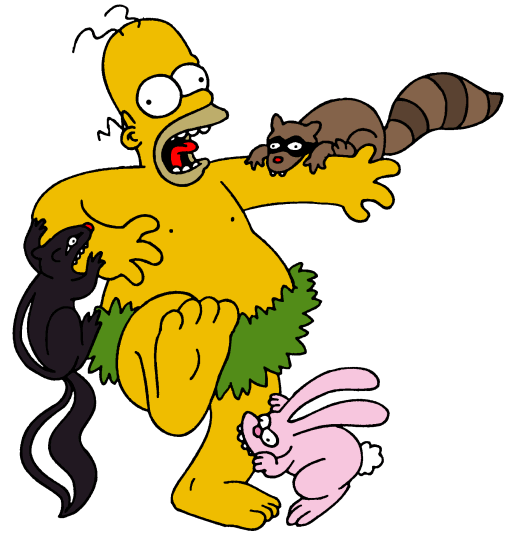

In [ ]:
imagem = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')
cv2_imshow(imagem)

In [ ]:
imagem.shape

(536, 514, 3)

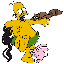

In [ ]:
imagem = cv2.resize(imagem, (64,64)) #mudar tamanho
cv2_imshow(imagem)

In [ ]:
imagem =  imagem/255 #normalizacao

In [ ]:
imagem.shape

(64, 64, 3)

In [ ]:
imagem =   imagem.reshape(-1,64,64,3)  #adicionando mais uma dimensao
imagem.shape  # o 1 significa a quantidade de imagems a ser mandado para a rede neural, sendoop batch size

(1, 64, 64, 3)

In [ ]:
previsao  = cnn1_loaded(imagem)
previsao

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[4.8653455e-04, 9.9951351e-01]], dtype=float32)>

In [ ]:
previsao=  np.argmax(previsao)
previsao

1

In [ ]:
dataset_test.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
if previsao == 0:
  print('Bart')
else:
  print('Homer')

Homer


##  Aplicacao para outro Dataset

### Carregar o dataset

In [ ]:
# puxando o dataset
path = '/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r') #r indica a leitura read
zip_object.extractall('./')
zip_object.close() #liberar memoria

### Split

In [ ]:
gerador_train = ImageDataGenerator(rescale = 1./255, rotation_range = 7, horizontal_flip = True, zoom_range = 0.2)
dataset_train = gerador_train.flow_from_directory('/content/cat_dog_2/training_set',
                                                  target_size = (64,64),
                                                  batch_size = 32,
                                                  class_mode = 'categorical',
                                                  shuffle = True)

Found 4000 images belonging to 2 classes.


In [ ]:
dataset_train.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
gerador_test = ImageDataGenerator(rescale=1./255)
dataset_test = gerador_test.flow_from_directory('/content/cat_dog_2/test_set',
                                                target_size = (64,64),
                                                batch_size = 1,
                                                class_mode  = 'categorical',
                                                shuffle=False)

Found 1000 images belonging to 2 classes.


In [ ]:
dataset_test.class_indices

{'cat': 0, 'dog': 1}

### Construcao da rede

In [ ]:
cnn2 = Sequential()
cnn2.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
cnn2.add(MaxPool2D(pool_size=(2,2)))

cnn2.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))#segunda camada de convolucao
cnn2.add(MaxPool2D(pool_size=(2,2)))#segunda camada de pooling

cnn2.add(Flatten()) #transformar para vetor

cnn2.add(Dense(units = 3137, activation='relu'))
cnn2.add(Dense(units = 3137, activation =  'relu'))
cnn2.add(Dense(units = 2, activation =  'softmax'))

print('rede criada')

rede criada


In [ ]:
(6272+2)/2

3137.0

In [ ]:
cnn2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_13 (Dense)            (None, 3137)             

In [ ]:
cnn2.compile(optimizer  ='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #compilacao da rede

In [ ]:
historico  = cnn2.fit(dataset_train, epochs = 1) #mudar quantidade de epocas

125/125 [==============================] - 13s 86ms/step - loss: 0.7493 - accuracy: 0.5225


### Avaliacao

In [ ]:
previsoes =  cnn2.predict(dataset_test) #ccada imagem sera envaida para a rede neural
previsoes

1000/1000 [==============================] - 5s 4ms/step


array([[0.4742502 , 0.5257498 ],
       [0.4800132 , 0.5199868 ],
       [0.48265404, 0.51734596],
       ...,
       [0.4797712 , 0.5202288 ],
       [0.480497  , 0.519503  ],
       [0.48997948, 0.51002055]], dtype=float32)

In [ ]:
previsoes = np.argmax(previsoes, axis = 1)  #forma de pegar os maiores valores
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
accuracy_score(dataset_test.classes, previsoes)

0.537

In [ ]:
print(classification_report(dataset_test.classes, previsoes))

              precision    recall  f1-score   support

           0       0.66      0.16      0.25       500
           1       0.52      0.92      0.66       500

    accuracy                           0.54      1000
   macro avg       0.59      0.54      0.46      1000
weighted avg       0.59      0.54      0.46      1000



# Projeto 10 - Transferencia de Arendizagem em RN

> Transferencia de Arendizagem eh a tranferencia de conhecinemnto adiquirido no treinamento de uma rede neural para outra rede. A ideia eh a utilizacao de caracterisiticas similares no objetivo de cada rede neural. O objetivo principal eh nao ter que treinar novamente uma rede

> Imaginet eh um banco de dados gigante de varios objetos todos em uma rede so.

> A tranferenciaa consiste na tranfenrecia dos pesos no que diz repeito a etapa convulocional (maxpoolinig e flattening) da rede original. O que teremos de construir do zero sera apenas a rede densa apos a camada convolucional.

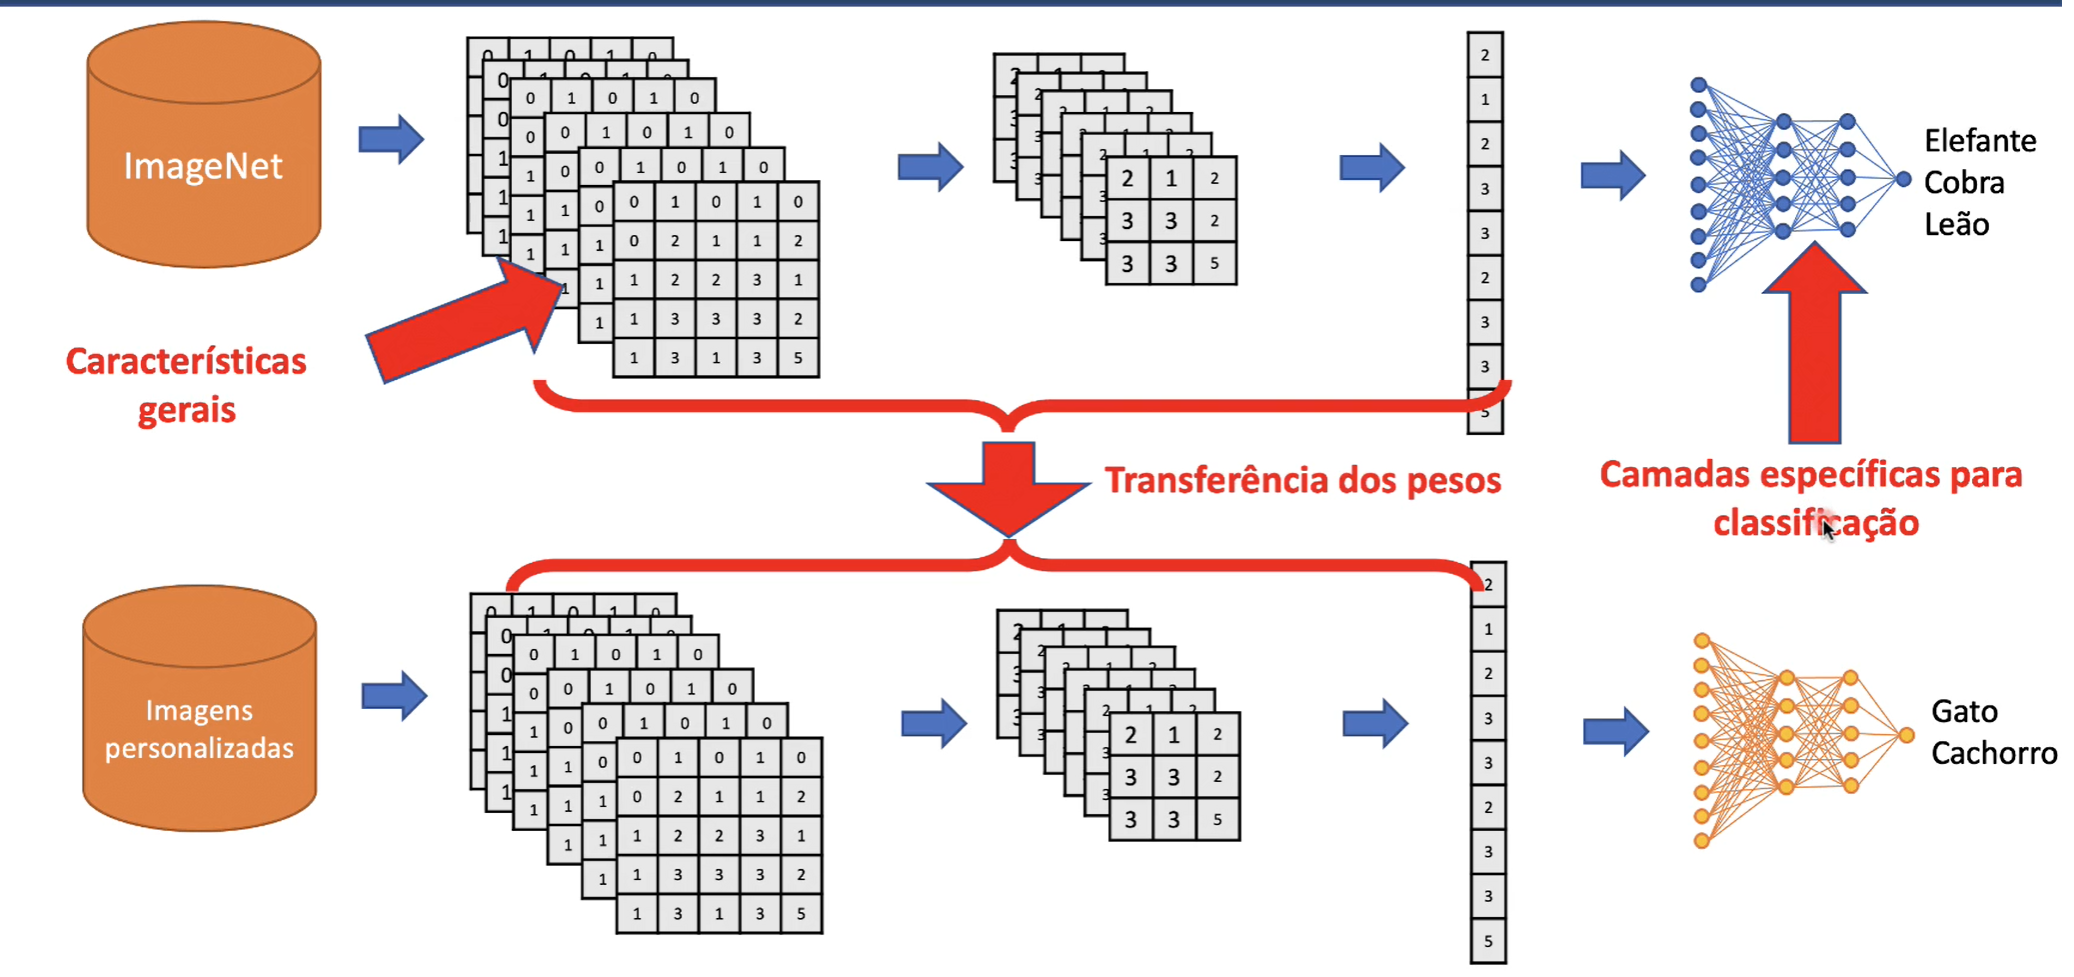

> Como os objetos possuem caracteristicas proximas, como olhos, boca e afins utiiilizamos a parte ja treinada da rede original e criamos a parte densa para extrair o restante das caracteristicas que classificam e caracterizam o objeto em analise.

>

## Carregar dataset

In [ ]:
path = '/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r') #r indica a leitura read
zip_object.extractall('./')
zip_object.close() #liberar memoria

## Base de dados de treinamento e teste

In [ ]:
# base de dados de treinamento
gerador_train = ImageDataGenerator(rescale=1./255, #criacao de novas imagens
                                   rotation_range=7,
                                   horizontal_flip=True,
                                   zoom_range=0.2)


dataset_train = gerador_train.flow_from_directory('/content/homer_bart_2/training_set', #criacao do dataset seguindo o modelo da rede neural original
                                                  target_size = (256,256),
                                                  batch_size = 8,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 215 images belonging to 2 classes.


In [ ]:
dataset_train.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
# base de dados de teste
gerador_test = ImageDataGenerator(rescale=1./255) #criacao de novas imagens


dataset_test = gerador_test.flow_from_directory('/content/homer_bart_2/test_set', #criacao do dataset seguindo o modelo da rede neural original
                                                  target_size = (256,256),
                                                  batch_size = 1, #envia uma em uma imagem
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 54 images belonging to 2 classes.


In [ ]:
dataset_test.class_indices

{'bart': 0, 'homer': 1}

## Rede Neural Pre Treinada

Resnet: https://arxiv.org/pdf/1512.03385.pdf

In [ ]:
modelo_base = tf.keras.applications.ResNet50(weights='imagenet', #arquitetura de uma rede neural treinada da ResNet
                                             include_top=False, #include_top = False significa o nao carregamento das camadas densas, apenas as convolucionais
                                             input_tensor = Input(shape = (256,256,3)))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
modelo_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
len(modelo_base.layers) #quantidade de camadas

175

o `GlobalAveragePooling2D` utiliza a media dos valores encontrados e nao mais o maximo. Outra coisa eh que ele funciona como a etapa de Flattening, transformando a matriz em um vetor, reduzindo a dimensionalidade da camada anterior. O Flattening faz aaumentar, uma vez que multiplica as dimensoes da camada anterior.

In [ ]:
#salvar os pesos
for layer in modelo_base.layers:
  layer.trainable = False #paramentro que faz com as camadas nao sejam treinadas

In [ ]:
for layer in modelo_base.layers:
  print(layer, layer.trainable) #possivel ver o False no fim de cada uma

<keras.src.engine.input_layer.InputLayer object at 0x7a0dbdb5ecb0> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a0dbd274370> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbd274670> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a0dbd275330> False
<keras.src.layers.core.activation.Activation object at 0x7a0dbd276440> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a0dbd275f30> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a0dbd276470> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbd274910> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a0dbc96c820> False
<keras.src.layers.core.activation.Activation object at 0x7a0dbc96ec50> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbc96efb0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization

## Camada Dense Propria

In [ ]:
modelo_base.output #acessando a ultimaa camada do modelo carregado

<KerasTensor: shape=(None, 8, 8, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
(2048+2)/2

1025.0

In [ ]:
#2048 -> 1025(80%) -> 1025(80%) -> 2
head_model = modelo_base.output # head siginifica a rede densa
head_model = GlobalAveragePooling2D()(head_model) # reduz a dimensionalidade e une ao modelo_baase.output
head_model = Dense(units = 1025, activation='relu')(head_model) #primeira camada unida ao globalaverage
head_model = Dropout(rate = 0.2)(head_model) #evita o overfitting, zerando alguns neuronios alatoriamente, nesse caso 20%
head_model = Dense(units = 1025, activation='relu')(head_model) #segunda camada
head_model = Dropout(rate = 0.2)(head_model)
head_model = Dense(units=2, activation='softmax')(head_model)

## Contrucao e treinamento

In [ ]:
#como as imagens deve entrar
modelo_base.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
# contrucao da rede
cnn = Model(inputs = modelo_base.input, outputs = head_model)

In [ ]:
cnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
cnn.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historico = cnn.fit(dataset_train, epochs = 50)
#valido dizer que o treinamento esta acontecendo apenas nas ultimas camadas da rede, as quais foram criadas e nao utilizadas de outra.

Epoch 1/50
27/27 [==============================] - 15s 212ms/step - loss: 1.1910 - accuracy: 0.5256
Epoch 2/50
27/27 [==============================] - 5s 198ms/step - loss: 0.6941 - accuracy: 0.5488
Epoch 3/50
27/27 [==============================] - 4s 141ms/step - loss: 0.6729 - accuracy: 0.6000
Epoch 4/50
27/27 [==============================] - 4s 142ms/step - loss: 0.6477 - accuracy: 0.6279
Epoch 5/50
27/27 [==============================] - 6s 235ms/step - loss: 0.6527 - accuracy: 0.6047
Epoch 6/50
27/27 [==============================] - 4s 156ms/step - loss: 0.6232 - accuracy: 0.6372
Epoch 7/50
27/27 [==============================] - 4s 141ms/step - loss: 0.6171 - accuracy: 0.6884
Epoch 8/50
27/27 [==============================] - 5s 188ms/step - loss: 0.5943 - accuracy: 0.6884
Epoch 9/50
27/27 [==============================] - 4s 147ms/step - loss: 0.6390 - accuracy: 0.6326
Epoch 10/50
27/27 [==============================] - 4s 140ms/step - loss: 0.5732 - accuracy: 0.716

## Avaliacao

In [ ]:
previsoes = cnn.predict(dataset_test)
previsoes

54/54 [==============================] - 3s 11ms/step


array([[9.33518529e-01, 6.64814040e-02],
       [7.72728860e-01, 2.27271110e-01],
       [3.15694138e-02, 9.68430638e-01],
       [9.60030556e-01, 3.99693735e-02],
       [9.68274355e-01, 3.17256674e-02],
       [9.54531729e-01, 4.54682522e-02],
       [5.04632597e-04, 9.99495387e-01],
       [5.15809596e-01, 4.84190404e-01],
       [4.40162778e-01, 5.59837222e-01],
       [6.53534293e-01, 3.46465737e-01],
       [2.13642232e-02, 9.78635848e-01],
       [9.67596173e-01, 3.24038677e-02],
       [9.48008657e-01, 5.19913621e-02],
       [3.09667230e-01, 6.90332770e-01],
       [7.81718731e-01, 2.18281299e-01],
       [9.91691351e-01, 8.30864068e-03],
       [6.40721545e-02, 9.35927868e-01],
       [2.93583661e-01, 7.06416368e-01],
       [9.59885478e-01, 4.01145145e-02],
       [9.48364437e-01, 5.16355447e-02],
       [2.83396661e-01, 7.16603339e-01],
       [9.42575514e-01, 5.74244782e-02],
       [9.99956369e-01, 4.35775837e-05],
       [7.21502244e-01, 2.78497756e-01],
       [9.768342

In [ ]:
previsoes = np.argmax(previsoes, axis = 1) #pegar o maior valor
previsoes

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(dataset_test.classes, previsoes)

0.8333333333333334

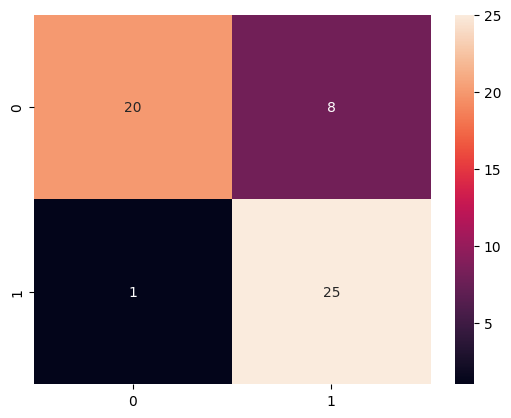

In [ ]:
cm = confusion_matrix(dataset_test.classes, previsoes)
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(dataset_test.classes, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.76      0.96      0.85        26

    accuracy                           0.83        54
   macro avg       0.85      0.84      0.83        54
weighted avg       0.86      0.83      0.83        54



# Projeto 11 - Fine Tuning em RN

> o processo de fine tuning eh um complemento do transfer learning.

> o fine tuning e a selecao de algumas camadas convolucionas/maxpooling e treinar somente algumas delas. Reduzindo o treinamento e a quantidade de pesos.

## Implementacao

In [ ]:
modelo_base.trainable = True #todas as camadas serao aleteradas para True, permitindo o treinamento delas.

In [ ]:
for layer in modelo_base.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7a0dbdb5ecb0> True
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a0dbd274370> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbd274670> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a0dbd275330> True
<keras.src.layers.core.activation.Activation object at 0x7a0dbd276440> True
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a0dbd275f30> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a0dbd276470> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbd274910> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a0dbc96c820> True
<keras.src.layers.core.activation.Activation object at 0x7a0dbc96ec50> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbc96efb0> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 

In [ ]:
len(modelo_base.layers)

175

In [ ]:
fine_tuning_at = 140 #indica que pegaremos apenas da camada 140 para frente para treinamento, trainable = True
# deixando das camadas 0 a 139 como trainable = False

In [ ]:
for layer in modelo_base.layers[:fine_tuning_at]: #camadas antes do 140
  layer.trainable = False

In [ ]:
#perceba que temos camadas agora com valores False e True (sendo True para os pesos mais proximos do final da rede neural)
for layer in modelo_base.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7a0dbdb5ecb0> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a0dbd274370> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbd274670> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a0dbd275330> False
<keras.src.layers.core.activation.Activation object at 0x7a0dbd276440> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a0dbd275f30> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a0dbd276470> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbd274910> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a0dbc96c820> False
<keras.src.layers.core.activation.Activation object at 0x7a0dbc96ec50> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0dbc96efb0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization

In [ ]:
cnn.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historico = cnn.fit(dataset_train, epochs = 50) # o processo de finetuing se torna mais interessante utilizar mais epocas

Epoch 1/50
27/27 [==============================] - 18s 144ms/step - loss: 3.3323 - accuracy: 0.5628
Epoch 2/50
27/27 [==============================] - 4s 144ms/step - loss: 0.7108 - accuracy: 0.6372
Epoch 3/50
27/27 [==============================] - 6s 216ms/step - loss: 0.5728 - accuracy: 0.7581
Epoch 4/50
27/27 [==============================] - 7s 256ms/step - loss: 0.6114 - accuracy: 0.7349
Epoch 5/50
27/27 [==============================] - 5s 184ms/step - loss: 0.5144 - accuracy: 0.7628
Epoch 6/50
27/27 [==============================] - 6s 206ms/step - loss: 0.4470 - accuracy: 0.8093
Epoch 7/50
27/27 [==============================] - 7s 258ms/step - loss: 0.4180 - accuracy: 0.8233
Epoch 8/50
27/27 [==============================] - 5s 160ms/step - loss: 0.4021 - accuracy: 0.8279
Epoch 9/50
27/27 [==============================] - 7s 255ms/step - loss: 0.4454 - accuracy: 0.8326
Epoch 10/50
27/27 [==============================] - 7s 248ms/step - loss: 0.5371 - accuracy: 0.776

## Avaliacao do Fine Tuning

In [ ]:
previsoes = cnn.predict(dataset_test)
previsoes

54/54 [==============================] - 2s 13ms/step


array([[9.99986053e-01, 1.39934591e-05],
       [1.00000000e+00, 8.46116441e-11],
       [4.84837772e-04, 9.99515176e-01],
       [1.00000000e+00, 3.36840111e-10],
       [9.97649491e-01, 2.35055317e-03],
       [1.00000000e+00, 2.26641347e-16],
       [1.96071877e-03, 9.98039305e-01],
       [6.43978238e-01, 3.56021762e-01],
       [4.91905399e-02, 9.50809479e-01],
       [7.85924569e-02, 9.21407580e-01],
       [4.64554760e-05, 9.99953508e-01],
       [7.95263708e-01, 2.04736277e-01],
       [1.00000000e+00, 7.91972174e-13],
       [6.51339069e-02, 9.34866130e-01],
       [1.63069874e-01, 8.36930156e-01],
       [1.00000000e+00, 1.10359757e-08],
       [9.99879003e-01, 1.21027122e-04],
       [1.00000000e+00, 3.23547994e-11],
       [9.99148011e-01, 8.51981982e-04],
       [1.00000000e+00, 1.17429884e-15],
       [4.59939428e-03, 9.95400608e-01],
       [9.76824105e-01, 2.31758747e-02],
       [9.99999881e-01, 1.08063119e-07],
       [9.95856583e-01, 4.14343737e-03],
       [1.000000

In [ ]:
previsoes = np.argmax(previsoes, axis = 1) #pegar o maior valor
previsoes

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(dataset_test.classes, previsoes)

0.8518518518518519

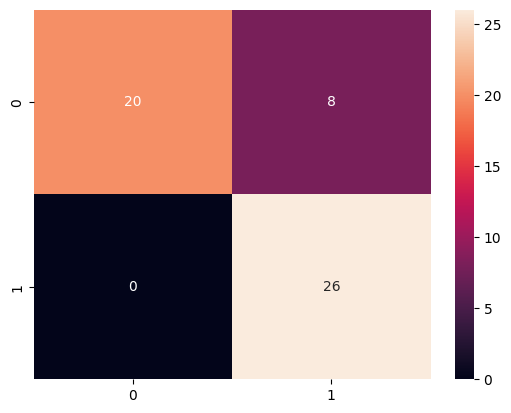

In [ ]:
cm = confusion_matrix(dataset_test.classes, previsoes)
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(dataset_test.classes, previsoes))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        28
           1       0.76      1.00      0.87        26

    accuracy                           0.85        54
   macro avg       0.88      0.86      0.85        54
weighted avg       0.89      0.85      0.85        54

